<a href="https://colab.research.google.com/github/ericlewisX/colorizing_images/blob/main/Cleaned_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.5.0
Running on TPU  ['10.56.176.226:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.56.176.226:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.56.176.226:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!curl https://sdk.cloud.google.com | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   443  100   443    0     0   1665      0 --:--:-- --:--:-- --:--:--  1659
######################################################################## 100.0%
Running install script from: /tmp/tmp.Owy0oZWVl0/install_google_cloud_sdk.bash
which curl
curl -# -f https://dl.google.com/dl/cloudsdk/channels/rapid/google-cloud-sdk.tar.gz
######################################################################## 100.0%

mkdir -p /root
"/root/google-cloud-sdk" already exists and may contain out of date files.
Remove /root/google-cloud-sdk or select a new installation directory, then run again.


In [ ]:
!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
compute:
  gce_metadata_read_timeout_sec: '0'
core:
  account: eric.lewish@gmail.com
  project: colorfy-322000

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
1
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

Choose the account you would like to use to perform operations for 
this configuration:
 [1] eric.lewish@gmail.com
 [2] Log in with a new account
Please enter your numeric choice:  
You are logged in as: [eric.lewish@gmail.com].

Pick cloud pro

In [ ]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list

In [ ]:
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0   9609      0 --:--:-- --:--:-- --:--:--  9609
OK


In [ ]:
!apt -qq update

94 packages can be upgraded. Run 'apt list --upgradable' to see them.


In [ ]:
!apt -qq install gcsfuse

gcsfuse is already the newest version (0.35.1).
0 upgraded, 0 newly installed, 0 to remove and 94 not upgraded.


In [ ]:
!mkdir imagedataset

mkdir: cannot create directory ‘imagedataset’: File exists


In [ ]:
!gcsfuse --implicit-dirs colorizinggalvanize imagedataset/

2021/08/06 18:05:49.068468 Using mount point: /content/imagedataset
2021/08/06 18:05:49.076137 Opening GCS connection...
2021/08/06 18:05:49.446507 Mounting file system "colorizinggalvanize"...
2021/08/06 18:05:49.446955 File system has been successfully mounted.


## Load Image for Posterity's Sake

In [ ]:
from keras.preprocessing.image import load_img

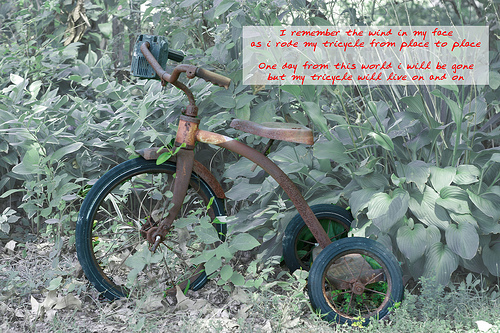

In [ ]:
load_img('imagedataset/data/images/test/ILSVRC2012_test_00000008.JPEG')

### Tensor Set Up - Board/Callbacks

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [ ]:
early_stopping = EarlyStopping(monitor='accuracy', patience=5)
model_checkpoint = ModelCheckpoint(filepath='./drive/MyDrive/Capstone3/models.h5',monitor='val_accuracy', save_best_only=True)
tensor_board = TensorBoard(log_dir="./logs" )

## Project Start

# My way

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import os
import random

from PIL import Image as im

from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave, imshow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, models

from tensorflow.keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, Input
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [ ]:
path = 'imagedataset/data/images/data/tinyset'

path20k = 'imagedataset/data/images/test'


In [ ]:
def load_data(path):
  '''
  This function loads all the images from a directory into a list.
  '''
  img_list = []
  for img in os.listdir(path):
      img = load_img(path + '/' + img)

      # PreProcess
      img = img.resize((256,256))

      lab = rgb2lab(img)
      
      img = np.array(lab) / 255 

      img_list.append(img)

  return img_list


In [ ]:
### Function declaration 1 ###

def imageset_preprocess(training_set):
    '''
    This function takes in a training set of RGB images & returns 
    a nested array of images that will be the X and Y matrices based on the LAB colorspace.
    '''
    # Will populate these empty lists with L-channels and ab-channels.
    X, Y = [], []
    
    for img in training_set:
        
        # img1 = img.resize((256,256))
        # lab = rgb2lab(img1)
        
        #Normalize 
        X.append(img[:, :, 0] / 100) # ? 100
        Y.append(img[:, :, 1:] / 128) # ab channels # ? 128
        
    X, Y = np.array(X), np.array(Y)
    X = X.reshape(X.shape + (1,)) # Make X & Y dimensions equal
    
    return  X, Y

In [ ]:
images = load_data(path20k)
# images

In [ ]:
images_800 = load_data(path)

In [ ]:
print(len(images))

18447


In [ ]:
X, Y = imageset_preprocess(images)

In [ ]:
X_800, Y_800 = imageset_preprocess(images_800)

In [ ]:
X.shape, Y.shape

In [ ]:
### Design Model ### 

# encoder
encoder = keras.models.Sequential([
  # first encoding layer
  keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)),
  # keras.layers.MaxPooling2D(2),

  # 2nd encoding layer
  keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"),

  # 3rd encoding layer
  keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", strides=2),
  # keras.layers.MaxPooling2D(2),

  # 4th encoding layer
  keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same"),

  # 5th encoding layer
  keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", strides=2),
  # keras.layers.MaxPooling2D(2),

  # 6th encoding layer
  keras.layers.Conv2D(512, (3, 3), activation="relu", padding="same"),

  # 7th encoding layer
  keras.layers.Conv2D(512, (3, 3), activation="relu", padding="same"),

  # 8th encoding layer
  keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same")
])

# decoder
decoder = keras.models.Sequential([
  
  # first decoding layer
  # keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
  
  # second decoding layer
  keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
  keras.layers.UpSampling2D((2, 2)),
  
  # 3rd decoding layer
  # keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
  
  # 4th decoding layer
  keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  keras.layers.UpSampling2D((2, 2)),

  # 5th decoding layer
  keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),

  # 6th decoding layer
  keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),

  # 7th decoding layer
  keras.layers.Conv2D(2, (3, 3), activation='tanh', padding='same'),
  keras.layers.UpSampling2D((2, 2))


])

# autoencoder
autoencoder = keras.models.Sequential([encoder, decoder])

opt = keras.optimizers.Adam(learning_rate = 0.01)

autoencoder.compile(loss="mse", optimizer = opt, metrics=['accuracy']) 

encoder.summary()

decoder.summary()

autoencoder.summary()

In [ ]:
# Train the model on the dataset
autoencoder.fit(X, Y, validation_split = 0.1,
                epochs = 100, batch_size = 64, verbose = 1, 
                callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
11/11 [==============================] - 34s 3s/step - loss: 2.2576e-07 - accuracy: 0.6629 - val_loss: 1.9841e-07 - val_accuracy: 0.6532
Epoch 2/100
11/11 [==============================] - 28s 3s/step - loss: 2.2521e-07 - accuracy: 0.6629 - val_loss: 1.9865e-07 - val_accuracy: 0.6532
Epoch 3/100
11/11 [==============================] - 28s 3s/step - loss: 2.2463e-07 - accuracy: 0.6629 - val_loss: 1.9772e-07 - val_accuracy: 0.6532
Epoch 4/100
11/11 [==============================] - 28s 3s/step - loss: 2.2423e-07 - accuracy: 0.6629 - val_loss: 1.9771e-07 - val_accuracy: 0.6532
Epoch 5/100
11/11 [==============================] - 28s 3s/step - loss: 2.2399e-07 - accuracy: 0.6629 - val_loss: 1.9760e-07 - val_accuracy: 0.6532
Epoch 6/100
11/11 [==============================] - 29s 3s/step - loss: 2.2398e-07 - accuracy: 0.6629 - val_loss: 1.9722e-07 - val_accuracy: 0.6532
Epoch 7/100
11/11 [==============================] - 29s 3s/step - loss: 2.2392e-07 - accuracy: 0.6629 - v

In [ ]:
%tensorboard --logdir logs/fit 

UsageError: Line magic function `%tensorboard` not found.


In [ ]:
autoencoder.save('drive/MyDrive/Capstone3/colorize_autoencoder_model100_769_images.h5')

In [ ]:
# Load saved model and test on images.
model = tf.keras.models.load_model('drive/MyDrive/Capstone3/colorize_autoencoder_model100_769_images.h5', custom_objects=None, compile=True)

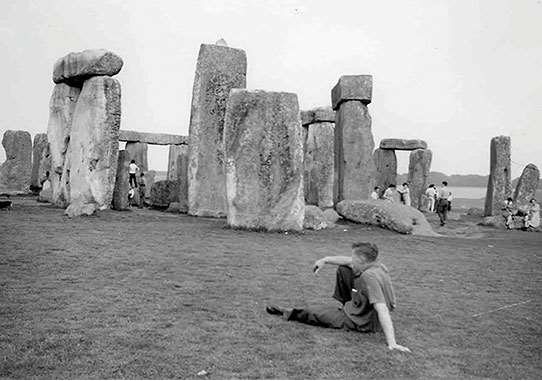

In [ ]:
m = load_img('imagedataset/bw/images/bwimages/man.png')
m

In [ ]:
def upload(m):

  some_list = []

  #preprocess
  img = m.resize((256,256))
  lab = rgb2lab(img)
  img = np.array(lab) / 255
  some_list.append(img)

  return some_list

In [ ]:
def upload_preprocess(some_list):
    '''
    This function takes in a training set of RGB images & returns 
    a nested array of images that will be the X and Y matrices based on the LAB colorspace.
    '''
    # Will populate these empty lists with L-channels and ab-channels.
    X, Y = [], []
    
    for img in some_list:
        
        # img1 = img.resize((256,256))
        # lab = rgb2lab(img1)
        
        #Normalize 
        X.append(img[:, :, 0])# ? 100
        Y.append(img[:, :, 1:] / 128) # ab channels # ? 128
        
    X, Y = np.array(X), np.array(Y)
    X = X.reshape(X.shape + (1,)) # Make X & Y dimensions equal
    
    return  X, Y

In [ ]:
uploaded = upload(m)
X_upload, Y_upload = upload_preprocess(uploaded)

In [ ]:
output1 = model.predict(X_upload)

output1 = output1*128
X_upload.shape, output1.shape

((1, 256, 256, 1), (1, 256, 256, 2))

In [ ]:
result = np.zeros((256, 256, 3))
result[:,:,0] = X_upload[0][:,:,0]*100
result[:,:,1:] = output1[0]*128

# result = result.resize((381, 542, 3))


imsave("drive/MyDrive/Capstone3/fullimage.png", lab2rgb(result))

In [ ]:
result.shape

(256, 256, 3)

In [ ]:
import cv2

In [ ]:
img = cv2.imread('imagedataset/bw/images/bwimages/man.png')
dimensions = img.shape
dimensions

(381, 542, 3)